# A)

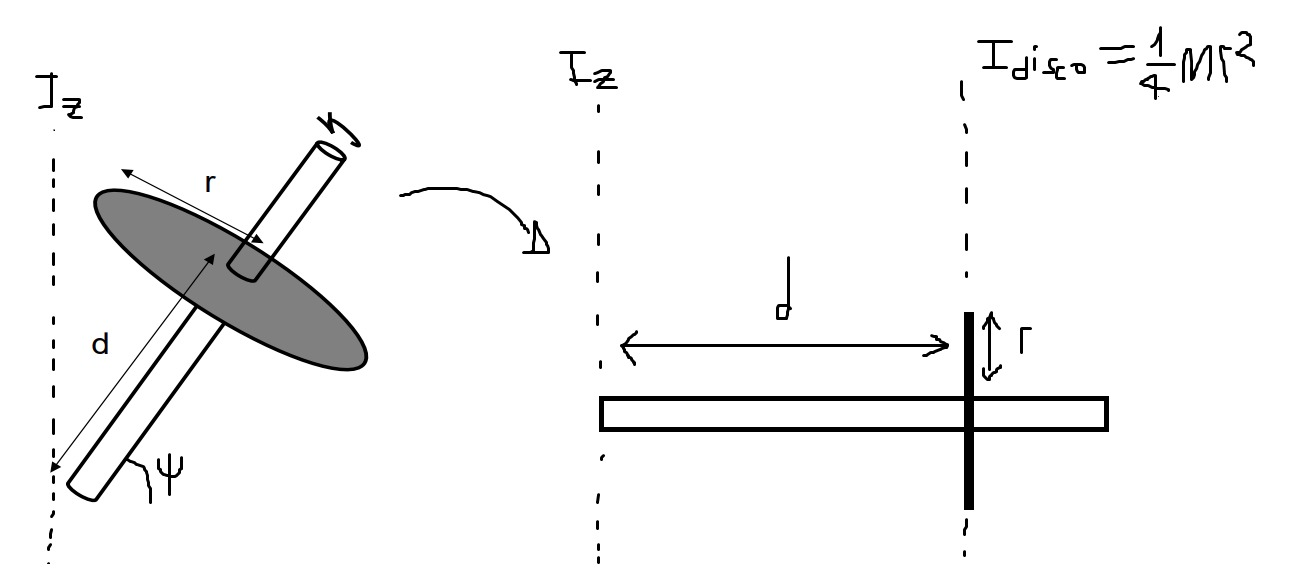

Primero, se hace una simplificación asumiendo en primera instancia que el trompo no está inclinado, sino que está en el suelo con el fin de que se pueda usar el teorema de ejes paralelos. Ahora bien, el momento de inercia de un disco para el eje mostrado en la imágen anterior es $\frac{1}{4}mr^2$ y el eje en el que está rotando el trompo está a una distancia $d$. Por lo tanto, por teorema de ejes paralelos, el momento de inercia requerido queda como $I_0 = \frac{1}{4}mr^2 + md^2$

# B)

Suponiendo que lo que se está pidiendo es demostrar el momento de inercia del disco en el eje z, la demostración es la siguiente:

\begin{equation*}
    I = \int{r^2 dm} = \rho \int{r^2 dA} = \frac{m}{\pi R^2} \int{r^2d(\pi r^2)} = \frac{2m}{R^2} \int{r^3 dr}
\end{equation*}

\begin{equation*}
    I = \frac{2m}{R^2} \int_0^R{r^3 dr} = \frac{2m}{R^2} \frac{mR^4}{4} = \frac{mR^2}{2}
\end{equation*}



# C)

El lagrangiano del sistema esta dado por:

\begin{equation}
L=\frac{1}{2} I_0 (\dot{\theta}^2 + \dot{\phi}^2 \sin^2{\theta}) + \frac{1}{2} I_z  (\dot{\phi} \cos{\theta} + \dot{\psi})^2 -mgd\cos{\theta}
\end{equation}


Segun las ecuaciones de Euler-Lagrange:

\begin{equation}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{q_i}}\bigg) = \frac{\partial L}{\partial {q_i}}
\end{equation}


Entonces:

\begin{equation}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\phi}}\bigg)= \frac{\partial L}{\partial {\phi}}
\end{equation}

Como $L$ no depende explicitamente de $\phi$:

\begin{equation}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\phi}}\bigg)= 0
\end{equation}

Entonces:

\begin{equation}
\frac{\partial L}{\partial \dot{\phi}}=p_\phi =cte
\end{equation}



\begin{equation}
\frac{\partial L}{\partial \dot{\phi}}= I_0 \dot{\phi} \sin^2{\theta} + I_z (\dot{\phi} \cos{\theta} +\dot{\psi}) \cos{\theta}=\dot{\phi} ( I_0 \sin^2{\theta} + I_z \cos^2{\theta}) + I_z \dot{\psi} \cos{\theta}=p_\phi
\end{equation}

Repitiendo el proceso para $\dot{\psi}$:

$$
\frac{\partial L}{\partial \dot{\psi}}=p_\psi=cte
$$


\begin{equation}
\frac{\partial L}{\partial \dot{\psi}}=  I_z (\dot{\phi} \cos{\theta} + \dot{\psi})=p_\psi
\end{equation}


Y para $\theta$:
\begin{equation}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\theta}}\bigg) = \frac{\partial L}{\partial {\theta}}
\end{equation}

$$
\frac{\partial L}{\partial {\theta}}=  I_0 \dot{\phi}^2 \sin{\theta} \cos{\theta} - I_z (\dot{\phi} \cos{\theta} +\dot{\psi}) -\sin{\theta} + mgd\sin{\theta} = \dot{\phi}^2 \sin{\theta} \cos{\theta} (I_0 -I_z) -I_z \dot{\phi} \dot{\psi} \sin{\theta}  + mgd\sin{\theta}
$$

$$
\frac{\partial L}{\partial \dot{\theta}}=I_0\dot{\theta}
$$

$$
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\theta}}\bigg) = I_0 \ddot{\theta}
$$


Por lo tanto:

$$
I_0 \ddot{\theta}=  \dot{\phi}^2 \sin{\theta} \cos{\theta} (I_0 -I_z) -I_z \dot{\phi} \dot{\psi} \sin{\theta}  + mgd\sin{\theta}
$$

 

In [3]:
%matplotlib notebook
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML



In [4]:
def System(r_,t,m,r,d,g,psidot,theta0):
    
    phi=r_[0]
    psi=r_[1]
    theta=r_[2]
    omega=r_[3]
    
    Iz=0.5*m*r**2
    I0=0.25*m*r**2+m*d**2
    
 
    
    
    dphi= (Iz*psidot*(np.cos(theta0)-np.cos(theta)))/(I0*np.sin(theta)**2+Iz*np.cos(theta)**2)
    
    
    dpsi= psidot
    
    dtheta=omega
    
    domega=  1/(I0) * (dphi**2 *(np.sin(theta)*np.cos(theta))*(I0-Iz)- dphi*dpsi*Iz*np.sin(theta)\
                     + m*g*d*np.sin(theta) )
  
    
    
    return [dphi,dpsi,dtheta,domega]
                    

In [5]:
m=0.1
r=0.1
d=0.3
g=9.81
psidot=400
theta0=0.25*np.pi
t=np.linspace(0,8,10000)
r0=[0,0,theta0,0]



In [6]:
sol= odeint(System,r0,t,args=(m,r,d,g,psidot,theta0))

In [7]:
phi=sol[:,0]
psi=sol[:,1]
theta=sol[:,2]
thetadot=sol[:,3]


<IPython.core.display.Javascript object>


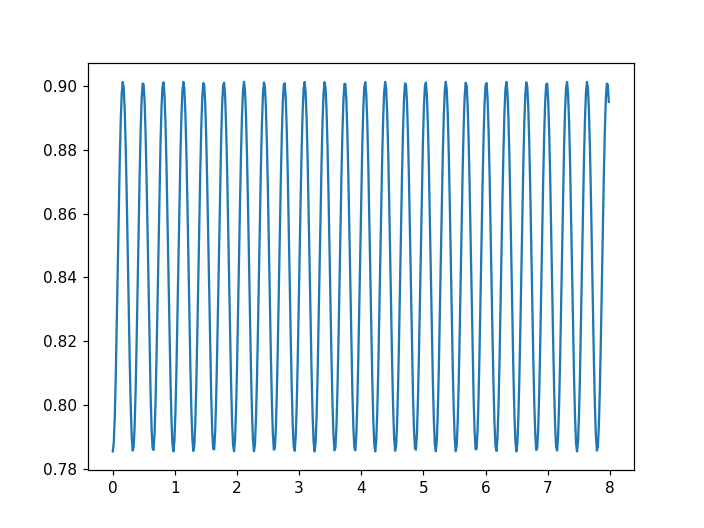

In [8]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.plot(t[::20],theta[::20])

<IPython.core.display.Javascript object>


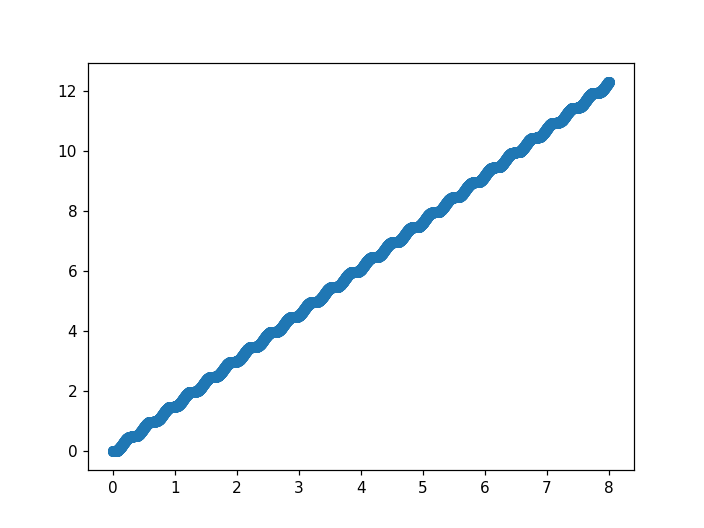

In [9]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(t,phi)

<IPython.core.display.Javascript object>


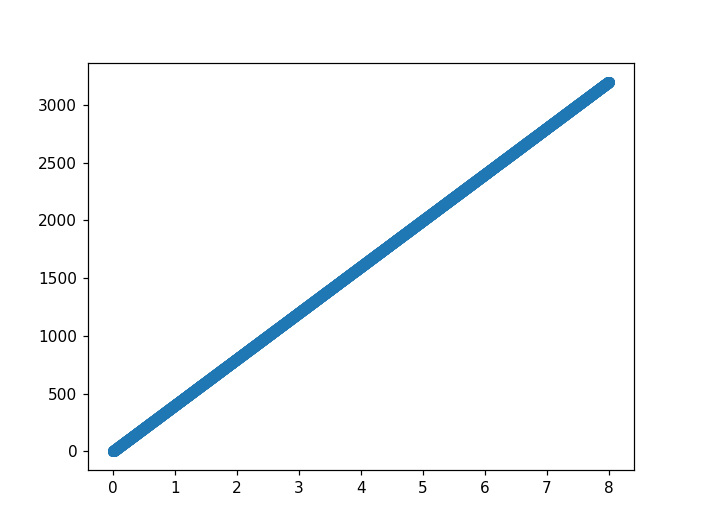

In [10]:
fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.scatter(t,psi)

In [11]:

position=np.zeros([len(t),3])

for i in range(len(t)):
    position[i,0]=d*np.sin(theta[i])*np.cos(phi[i])
    position[i,1]=d*np.sin(theta[i])*np.sin(phi[i])
    position[i,2]=d*np.cos(theta[i])
    
    


<IPython.core.display.Javascript object>


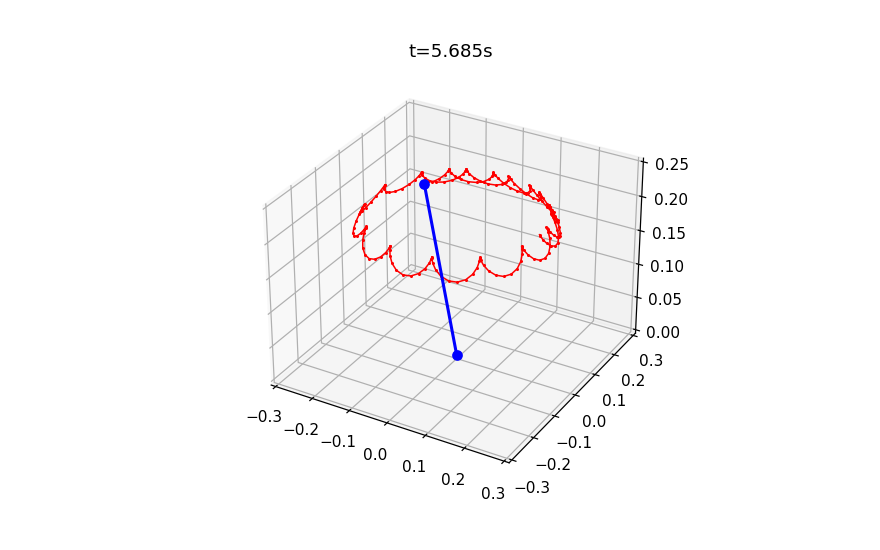

In [20]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')
scale=35

def init():
    
    ax.clear()
    ax.set_xlim(-0.3,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_zlim(0,0.25)
    

    




def Update(i):
    
    init()

        
    x = position[::scale][i,0]
    y = position[::scale][i,1]
    z = position[::scale][i,2]
    
    history_x=position[::scale][:i,0]
    history_y=position[::scale][:i,1]
    history_z=position[::scale][:i,2]
    
    
      
    if i<=1000:
    
     
      ax.plot(history_x, history_y,history_z,'.-', lw=1, ms=2,c="r")
    
    else:     
      ax.plot(history_x[i-30:i], history_y[i-30:i],history_z[i-30:i],'.-', lw=1, ms=2,c="r")

    ax.scatter(x,y,z,c="b")
    ax.plot([0,x], [0,y],[0,z], 'o-', lw=2,c="b")
    ax.set_title(r't={:.3f}s'.format(t[::scale][i]))
  
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t[::scale]),init_func=init)


In [17]:
T_precesion=[]

for i in range(len(phi)):
    
    if phi[i]> 2*np.pi- 1e-3 and phi[i]< 2*np.pi+1e-3:
        
        T_precesion.append(t[i])
    
    
T = np.mean(T_precesion)
T

4.082008200820082

In [19]:
v_precesion = 2*np.pi/T
v_precesion

1.5392387761291817